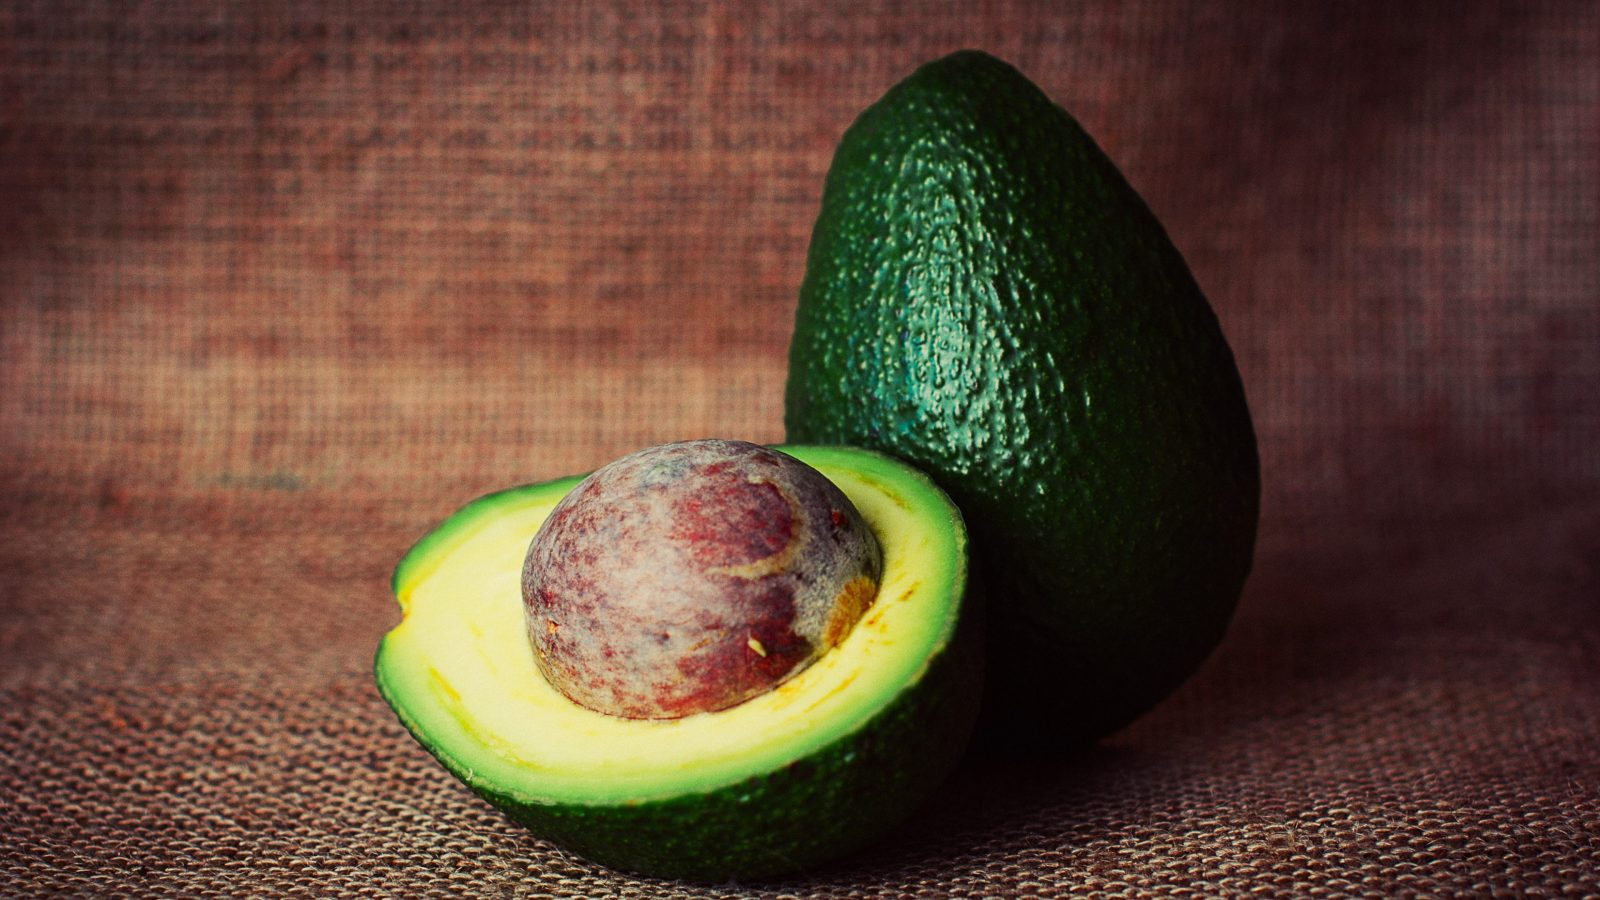

### Problem Statement

### Import Tools

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

from pandas_profiling import  profile_report

%matplotlib inline

from  sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from  sklearn.preprocessing   import StandardScaler,LabelEncoder
from  sklearn.linear_model    import LinearRegression
from  sklearn.tree            import DecisionTreeRegressor,export_graphviz
from  sklearn.ensemble        import RandomForestRegressor
from  sklearn.metrics         import mean_squared_error,r2_score

### Load Data

In [2]:
avocado_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

In [3]:
#- Drop First Column
avocado_df.drop(avocado_df.columns[0],axis=1,inplace=True)

<a id=section301></a>
#### Description of the Dataset
- PLU - Product Lookup Code
- Oz is unit of measure Ounces : 1oz= 28.34952g
- Detailed information about each column can be found below

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Date                           | The date of the observation                                                                | 
| AveragePrice                   | the average price of a single avocado                                                      | 
| type                           | conventional or organic                                                                    | 
| year                           | the year                                                                                   |
| Region                         | the city or region of the observation                                                      |
| Total Volume                   | Total number of avocados sold                                                              |
| 4046                           | Total number of avocados with PLU 4046 sold - Small/Medium Hass Avocado (~3-5oz avocado)   |
| 4225                           | Total number of avocados with PLU 4225 sold - Large Hass Avocado (~8-10oz avocado)         |
| 4770                           | Total number of avocados with PLU 4770 sold - Extra Large Hass Avocado (~10-15oz avocado)  |
| Total Bags                     | Total number of avocados bags sold                                                         |
| Small Bags                     | Total number of avocados small bags sold                                                   |
| Large Bags                     | Total number of avocados Large bags sold                                                   |
| XLarge Bags                    | Total number of avocados XLarge bags sold                                                  |

#### head()

In [4]:
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### info()

In [5]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
avocado_df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### describe()

In [7]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
avocado_df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249,18249.0000,18249
unique,169,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,54
top,2017-03-19,nan,nan,nan,nan,nan,nan,nan,nan,nan,conventional,nan,HarrisburgScranton
freq,108,nan,nan,nan,nan,nan,nan,nan,nan,nan,9126,nan,338
mean,NaN,1.4060,850644.0130,293008.4245,295154.5684,22839.7360,239639.2021,182194.6867,54338.0881,3106.4265,NaN,2016.1479,NaN
std,NaN,0.4027,3453545.3554,1264989.0818,1204120.4011,107464.0684,986242.3992,746178.5150,243965.9645,17692.8947,NaN,0.9399,NaN
min,NaN,0.4400,84.5600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,2015.0000,NaN
25%,NaN,1.1000,10838.5800,854.0700,3008.7800,0.0000,5088.6400,2849.4200,127.4700,0.0000,NaN,2015.0000,NaN
50%,NaN,1.3700,107376.7600,8645.3000,29061.0200,184.9900,39743.8300,26362.8200,2647.7100,0.0000,NaN,2016.0000,NaN
75%,NaN,1.6600,432962.2900,111020.2000,150206.8600,6243.4200,110783.3700,83337.6700,22029.2500,132.5000,NaN,2017.0000,NaN


### Pre-Profiling

In [8]:
profile = avocado_df.profile_report(title='avocado preprofiling')
profile.to_file(output_file='avocado_preprofiling.html')

### Pre-Processing of Data

In [9]:
#- Number of Avocados sold cannot be float - converting to int
for col in ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']:
    avocado_df[col] = avocado_df[col].astype(np.int64)

In [10]:
avocado_df.dtypes

Date             object
AveragePrice    float64
Total Volume      int64
4046              int64
4225              int64
4770              int64
Total Bags        int64
Small Bags        int64
Large Bags        int64
XLarge Bags       int64
type             object
year              int64
region           object
dtype: object

### Post-Profiling

In [11]:
profile = avocado_df.profile_report(title='avocado postprofiling')
profile.to_file(output_file='avocado_postprofiling.html')

### Exploratory Data Analysis

In [12]:
avocado_eda = avocado_df.copy()

In [13]:
avocado_eda.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.3300,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany
1,2015-12-20,1.3500,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany
2,2015-12-13,0.9300,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany
3,2015-12-06,1.0800,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany
4,2015-11-29,1.2800,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany


In [14]:
#- convert Date Column to datetime64[ns] type
avocado_eda['Date'] = pd.to_datetime(avocado_eda['Date'],format='%Y-%m-%d')
avocado_eda.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume             int64
4046                     int64
4225                     int64
4770                     int64
Total Bags               int64
Small Bags               int64
Large Bags               int64
XLarge Bags              int64
type                    object
year                     int64
region                  object
dtype: object

In [15]:
avocado_eda['Month'] = avocado_eda['Date'].dt.month_name()
avocado_eda['Week_Day'] = avocado_eda['Date'].dt.day_name()
avocado_eda.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Week_Day
0,2015-12-27,1.3300,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany,December,Sunday
1,2015-12-20,1.3500,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany,December,Sunday


#### Univariate Analysis

##### AveragePrice Distribution 

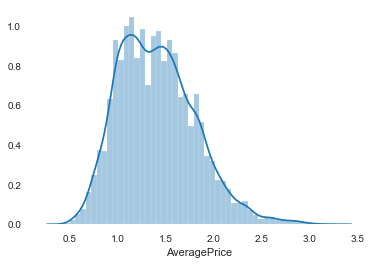

In [16]:
sns.distplot(avocado_eda['AveragePrice'])

#####  Frequency Distribution of Avocado sales based on PLU

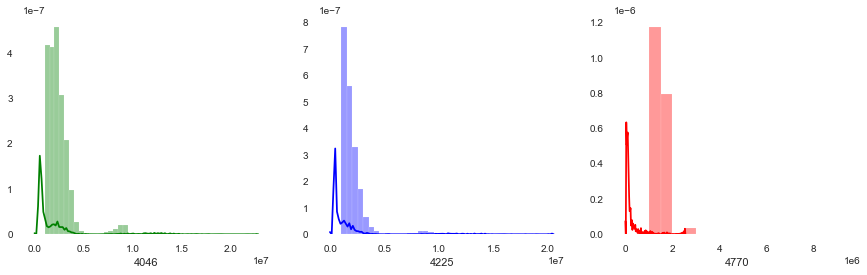

In [17]:
f,ax = plt.subplots(1,3,figsize=(15,4))
bins=np.arange(1000000,10000000,500000)
sns.distplot(avocado_eda['4046'],color='green',ax=ax[0],bins=bins)
sns.distplot(avocado_eda['4225'],color='blue',ax=ax[1],bins=bins)
sns.distplot(avocado_eda['4770'],color='red',ax=ax[2],bins=bins)

##### Frequency Distribution of Avocado sales through Bags

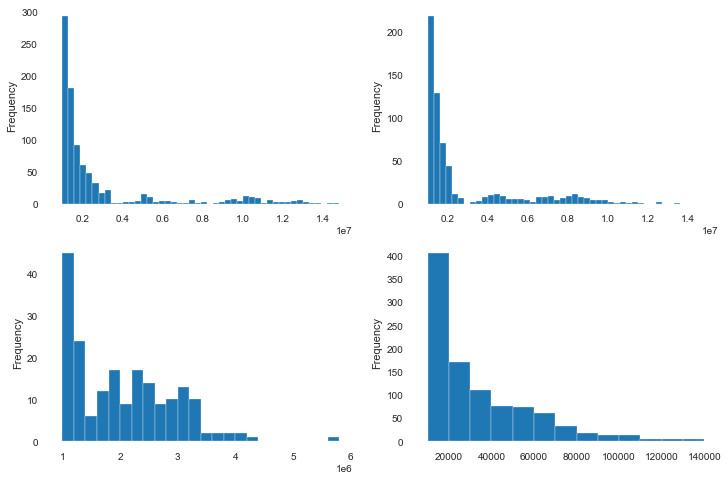

In [18]:
f,ax = plt.subplots(2,2,figsize=(12,8))
bins = np.arange(1000000,20000000,500000)
avocado_eda['Total Bags'].plot(kind='hist',bins=np.arange(1000000,15000000,300000),ax=ax[0,0])
avocado_eda['Small Bags'].plot(kind='hist',bins=np.arange(1000000,15000000,300000),ax=ax[0,1])
avocado_eda['Large Bags'].plot(kind='hist',bins=np.arange(1000000,6000000,200000),ax=ax[1,0])
avocado_eda['XLarge Bags'].plot(kind='hist',bins=np.arange(10000,150000,10000),ax=ax[1,1])

##### Avocado Sale Transactions count for Type,Year and WeekDay 

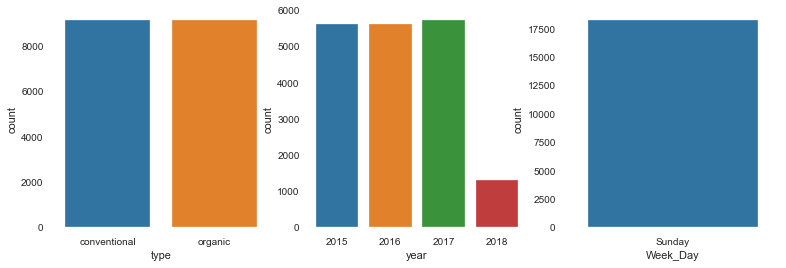

In [19]:
f,ax = plt.subplots(1,3,figsize=(13,4))
sns.countplot(x='type',data=avocado_eda,ax=ax[0])
sns.countplot(x='year',data=avocado_eda,ax=ax[1])
sns.countplot(x='Week_Day',data=avocado_eda,ax=ax[2])

##### Avocado Sale transactions are more in the month of ?

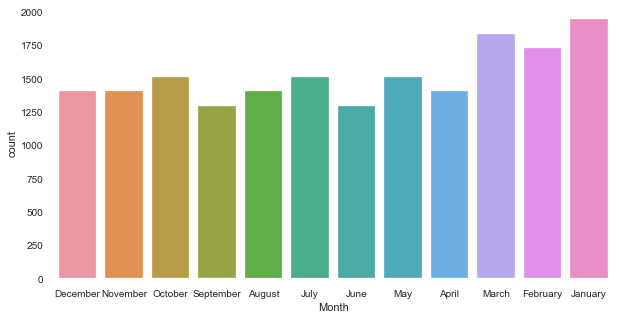

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month',data=avocado_eda)

#### Bivariate Analysis

##### Number of Avocados sold more in the month of ?

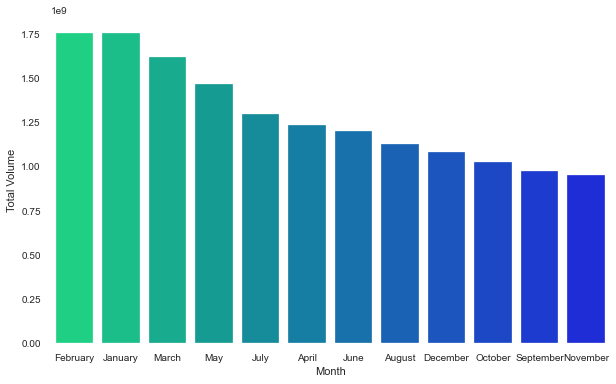

In [21]:
df_monthly_vol = avocado_eda.groupby('Month')[["Total Volume"]].agg(sum).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Month',y='Total Volume',data=df_monthly_vol.sort_values('Total Volume',ascending=False),palette='winter_r')

##### Number of Avocados sold more in the State of ? 

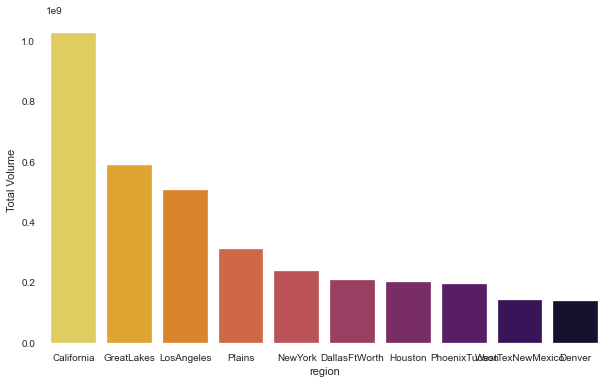

In [22]:
df_region_vol = avocado_eda.groupby('region')[["Total Volume"]].agg(sum).reset_index()
#- Dropping rows other than States
for reg in ['Midsouth','Northeast','SouthCentral','Southeast','TotalUS','West']:
    indexes = df_region_vol[df_region_vol.region == reg].index
    df_region_vol.drop(indexes,axis=0,inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x='region',y='Total Volume',data=df_region_vol.sort_values('Total Volume',ascending=False)[:10],palette='inferno_r')

##### Number of Avocados sold more in the year of ?

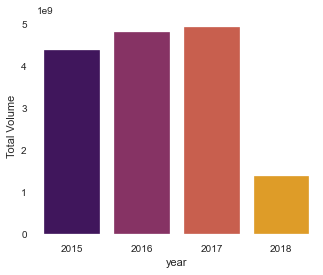

In [23]:
df_yearly_vol = avocado_eda.groupby('year')[["Total Volume"]].agg(sum).reset_index()
plt.figure(figsize=(5,4))
sns.barplot(x='year',y='Total Volume',data=df_yearly_vol.sort_values('Total Volume',ascending=False),palette='inferno')

##### Which Type of Avocados are sold more ? Conventional or Organic ?

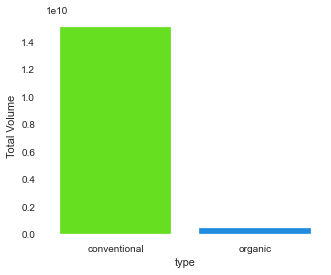

In [24]:
df_type_vol = avocado_eda.groupby('type')[["Total Volume"]].agg(sum).reset_index()
plt.figure(figsize=(5,4))
sns.barplot(x='type',y='Total Volume',data=df_type_vol.sort_values('Total Volume',ascending=False),palette='gist_rainbow')

##### Average Price of an Avocado more in the month of ?

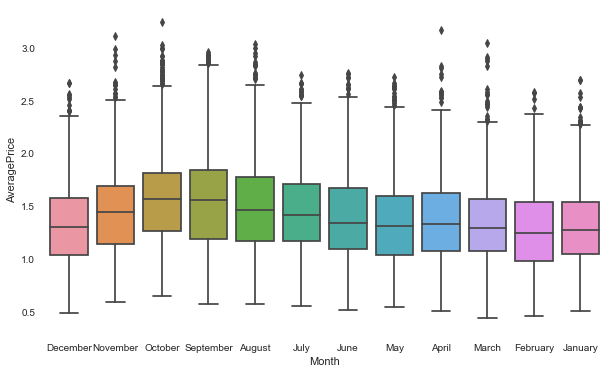

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Month',y='AveragePrice',data=avocado_eda)

##### Average Price of an Avocado is more in the year of ?

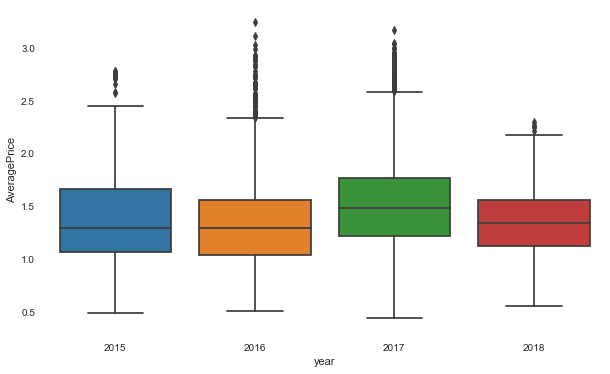

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='year',y='AveragePrice',data=avocado_eda)

##### AveragePrice of an Avocado is more for which type ?

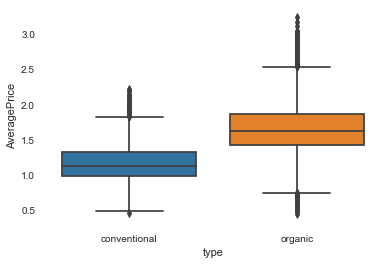

In [27]:
sns.boxplot(x='type',y='AveragePrice',data=avocado_eda)

##### Out of Total Number of Avocados sold - which PLU contributes more ?

Text(0, 0.5, '')

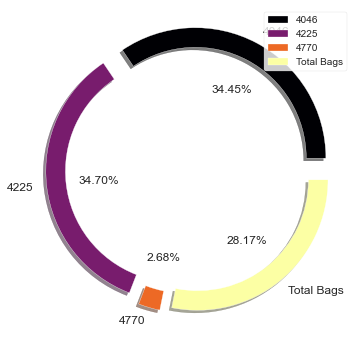

In [28]:
df_avocado_per = avocado_eda[['4046','4225','4770','Total Bags']].agg(sum)
df_avocado_per.plot(kind='pie',figsize=(6,6),autopct='%.2f%%',
                    explode=[0.1,0.1,0.1,0.1],
                    fontsize=12,legend=True,wedgeprops={'width':0.15},
                    shadow=True,cmap='inferno')
plt.ylabel("")

##### Avocados sales are more from which type of bags ?

Text(0, 0.5, '')

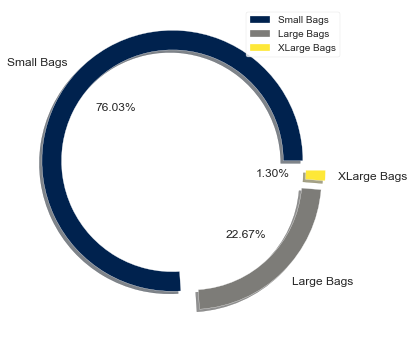

In [29]:
df_avocado_bag_per = avocado_eda[['Small Bags', 'Large Bags', 'XLarge Bags']].agg(sum)
df_avocado_bag_per.plot(kind='pie',figsize=(6,6),autopct='%.2f%%',
                    explode=[0.1,0.1,0.1],
                    fontsize=12,legend=True,wedgeprops={'width':0.15},
                    shadow=True,cmap='cividis')
plt.ylabel("")

#### Multivariate Analysis

##### Avocado sale based on its PLU and its type

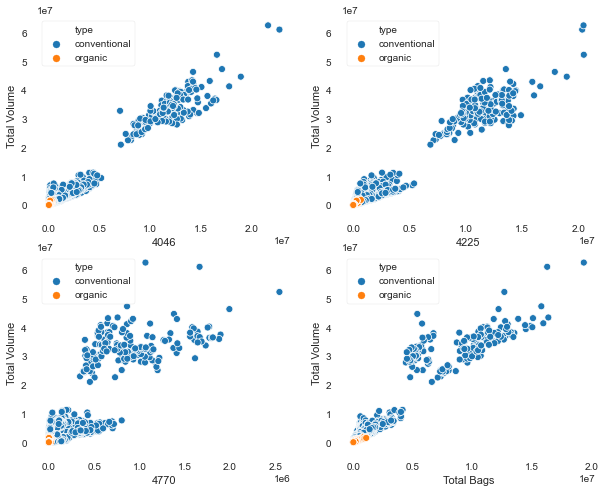

In [30]:
f,ax = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(x='4046',y='Total Volume',data=avocado_eda,hue='type',ax=ax[0,0])
sns.scatterplot(x='4225',y='Total Volume',data=avocado_eda,hue='type',ax=ax[0,1])
sns.scatterplot(x='4770',y='Total Volume',data=avocado_eda,hue='type',ax=ax[1,0])
sns.scatterplot(x='Total Bags',y='Total Volume',data=avocado_eda,hue='type',ax=ax[1,1])

##### Heat Map

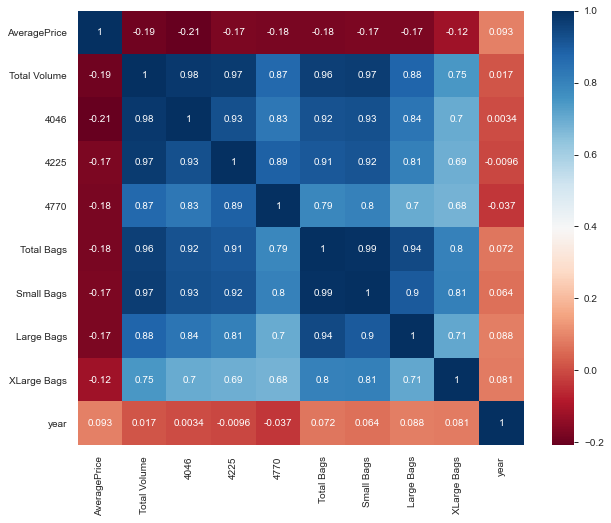

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(avocado_eda.corr(),cmap='RdBu', annot=True)

##### Parallel Coordinates

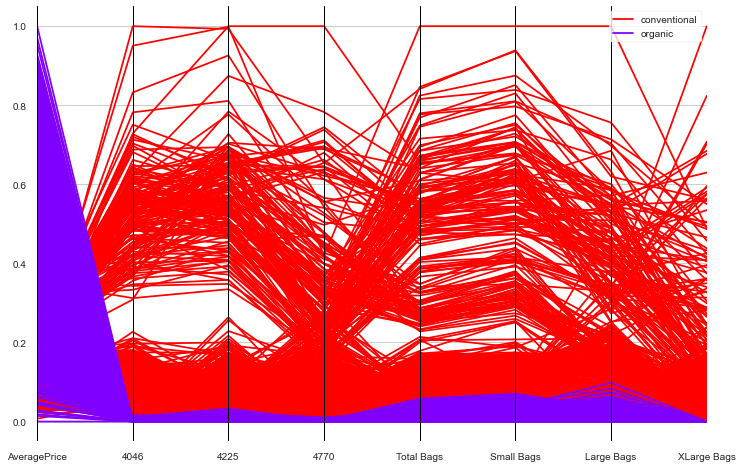

In [32]:
from pandas.plotting import parallel_coordinates
df_pc = avocado_eda.copy()
for colname in avocado_eda.columns:
    if colname in ['AveragePrice','4046', '4225', '4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']:
        df_pc[colname] = (df_pc[colname] - df_pc[colname].min()) / (
            df_pc[colname].max() - df_pc[colname].min())
plt.figure(figsize=(12, 8))
parallel_coordinates(df_pc,
                     class_column='type',
                     colormap='rainbow_r',
                     cols=['AveragePrice','4046', '4225', '4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags'])
                        

###  Summary

### Conclusion

### Building ML Models 

In [33]:
#- Converting object type to datetimens
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'],format='%Y-%m-%d')
avocado_df['Month'] = avocado_df.Date.dt.month_name()
avocado_df.drop('Date',axis=1,inplace=True)

In [34]:
avocado_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.3300,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany,December
1,1.3500,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany,December
2,0.9300,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany,December
3,1.0800,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany,December
4,1.2800,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany,November


#### Assumption-1 : Target Variable should be normally distributed

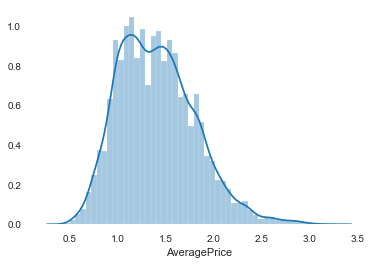

In [35]:
sns.distplot(avocado_df.AveragePrice)

#### Assumption-2 : Linear Relationship between Target Variable and Explanatory variables

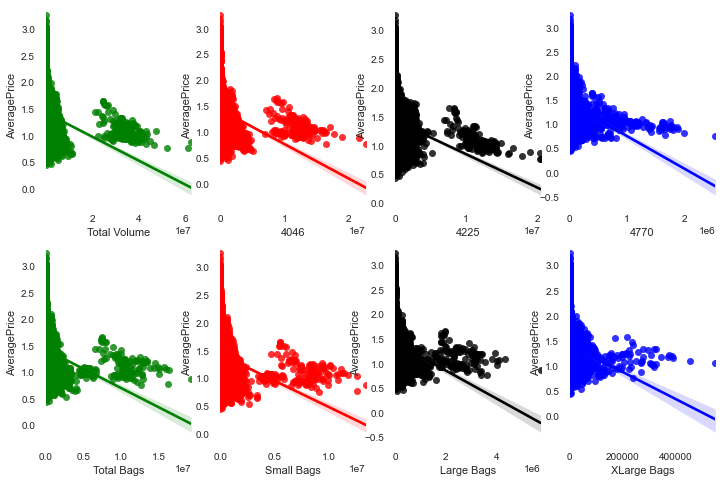

In [36]:
f,ax = plt.subplots(2,4,figsize=(12,8))
sns.regplot(x='Total Volume',y='AveragePrice',data=avocado_df,ax=ax[0,0],color='green')
sns.regplot(x='4046',y='AveragePrice',data=avocado_df,ax=ax[0,1],color='red')
sns.regplot(x='4225',y='AveragePrice',data=avocado_df,ax=ax[0,2],color='black')
sns.regplot(x='4770',y='AveragePrice',data=avocado_df,ax=ax[0,3],color='blue')
sns.regplot(x='Total Bags',y='AveragePrice',data=avocado_df,ax=ax[1,0],color='green')
sns.regplot(x='Small Bags',y='AveragePrice',data=avocado_df,ax=ax[1,1],color='red')
sns.regplot(x='Large Bags',y='AveragePrice',data=avocado_df,ax=ax[1,2],color='black')
sns.regplot(x='XLarge Bags',y='AveragePrice',data=avocado_df,ax=ax[1,3],color='blue')

#### Assumption-3 : No Multicollinearity 

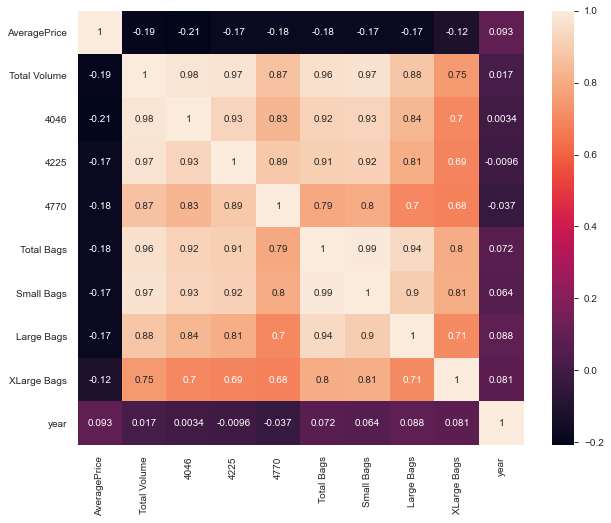

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(avocado_df.corr(),annot=True)

In [38]:
# - Drop Highly corrleated column 
avocado_df.drop('Total Volume',axis=1,inplace=True)

#### OneHot Encoding on Categorical Columns

In [39]:
#- One Hot Enconding for the categorical columns - type,region,Month
avocado_df = pd.get_dummies(data=avocado_df,columns=['type','region','Month'],drop_first=True)

#### Train-Test Split

In [40]:
exp_var = [ i for i in avocado_df.columns if i != "AveragePrice"]
X = avocado_df[exp_var]      #- explanatory variables
y = avocado_df.AveragePrice  #- target variable

In [41]:
#- Train - Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
print("X_Train Shape",X_train.shape)
print("X_Test  Shape",X_test.shape)
print("y_Train Shape",y_train.shape)
print("y_Test  Shape",y_test.shape)

X_Train Shape (14599, 73)
X_Test  Shape (3650, 73)
y_Train Shape (14599,)
y_Test  Shape (3650,)


#### Standardize Explanatory variables using StandardScaler

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

####  Defining Method to Calculate Adjusted RSquared

In [44]:
#- P - number of explanatory varaibles  X_test.shape[-1]
#- N - number of observations           X_test.shape[0]
def adjusted_rsquare(r_square,P,N):
    return (1 - ((( 1 -r_square)*(N - 1))/(N-P-1)))

#### Linear Regression Model

In [45]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_linreg_pred_train = linreg.predict(X_train_scaled)
y_linreg_pred_test = linreg.predict(X_test_scaled)
print(linreg.intercept_,linreg.coef_)

1.4041345297623766 [ 1.32701524e-02 -1.99046800e-02  3.29764690e-03 -5.85430055e+03
  4.42060574e+03  1.45405278e+03  1.04871016e+02  5.46201331e-02
  2.44231695e-01 -3.36300937e-02 -4.88078339e-03 -3.07594127e-02
 -5.04450171e-03 -7.14624679e-03 -2.31415027e-02  4.19820609e-03
 -3.64762509e-03 -4.91079048e-02 -4.23157640e-02 -6.83373073e-02
 -4.69419862e-02 -4.10967938e-02 -9.23562376e-03 -3.17042979e-02
 -7.82731749e-03  3.34487457e-02 -7.36374583e-02 -3.38392201e-02
 -8.30091101e-03 -2.56347788e-02 -5.11735249e-02 -3.92214540e-02
 -1.90684541e-02 -1.99084522e-02 -4.92217442e-02 -3.59000913e-02
  2.27130917e-02  7.95518713e-03 -1.32225055e-02 -7.69043239e-03
  8.38931634e-03 -4.63835768e-02 -2.80097727e-02 -1.93329237e-02
 -3.31799263e-02 -2.28024849e-03 -3.72452483e-02 -4.52684367e-02
  6.39248192e-03 -2.36763407e-02  3.19190162e-02 -1.83982898e-02
 -2.27877154e-02 -6.34731770e-02 -2.38315606e-02 -1.63067398e-02
 -1.96373623e-02 -6.76162556e-03 -2.04625012e-02 -2.66644864e-02
 -3.81

##### Model Evaluation

###### Root Mean Squared Error

In [46]:
#- Root Mean Square Error
linreg_rmse_train = np.sqrt(mean_squared_error(y_train,y_linreg_pred_train))
linreg_rmse_test  = np.sqrt(mean_squared_error(y_test,y_linreg_pred_test))
print("Linear Regression  RMSE \n\tTrain {}\n\tTest  {}\n".format(linreg_rmse_train,linreg_rmse_test))

Linear Regression  RMSE 
	Train 0.24604002217109316
	Test  0.2464819133722178



###### R-Squared

In [47]:
#- R-Square
linreg_r2_train = r2_score(y_train,y_linreg_pred_train)
linreg_r2_test  = r2_score(y_test,y_linreg_pred_test)
print("Linear Regression  R-Squared \n\tTrain {}\n\tTest  {}\n".format(linreg_r2_train,linreg_r2_test))

Linear Regression  R-Squared 
	Train 0.6261131077029964
	Test  0.6272644706024353



######  Adjusted R-Squared

In [48]:
#- Adjusted R-Squared
linreg_adj_r2_train = adjusted_rsquare(linreg_r2_train,X_train.shape[-1],X_train.shape[0])
linreg_adj_r2_test  = adjusted_rsquare(linreg_r2_test,X_test.shape[-1],X_test.shape[0])
print("Linear Regression  Adjusted RSquared \n\tTrain {}\n\tTest  {}\n".format(linreg_adj_r2_train,linreg_adj_r2_test))

Linear Regression  Adjusted RSquared 
	Train 0.624234020395755
	Test  0.6196554958692075



#### Linear Regression Model using GridSearchCV 

In [49]:
linreg_grid = LinearRegression()
params = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept' : [True, False]}

linreg_grid = GridSearchCV(linreg_grid, params, cv = 10,refit = True)
linreg_grid.fit(X_train_scaled, y_train)   

print("Mean cross-validated score of the best_estimator : ", linreg_grid.best_score_)  
print("params we got the best score : ",linreg_grid.best_params_)

y_linreg_grid_pred_test  = linreg_grid.predict(X_test_scaled)
y_linreg_grid_pred_train = linreg_grid.predict(X_train_scaled)

Mean cross-validated score of the best_estimator :  0.6215132320867895
params we got the best score :  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


##### Model Evaluation

###### Root Mean Squared Error

In [50]:
#- Root Mean Square Error
linreg_grid_rmse_train = np.sqrt(mean_squared_error(y_train,y_linreg_grid_pred_train))
linreg_grid_rmse_test  = np.sqrt(mean_squared_error(y_test,y_linreg_grid_pred_test))
print("Linear Regression With GridSearchCV RMSE \n\tTrain {}\n\tTest  {}\n".format(
            linreg_grid_rmse_train,linreg_grid_rmse_test))

Linear Regression With GridSearchCV RMSE 
	Train 0.24604002217109316
	Test  0.2464819133722178



###### R-Squared

In [51]:
#- R-Square
linreg_grid_r2_train = r2_score(y_train,y_linreg_grid_pred_train)
linreg_grid_r2_test  = r2_score(y_test,y_linreg_grid_pred_test)
print("Linear Regression With GridSearchCV R-Squared \n\tTrain {}\n\tTest  {}\n".format(
            linreg_grid_r2_train,linreg_grid_r2_test))

Linear Regression With GridSearchCV R-Squared 
	Train 0.6261131077029964
	Test  0.6272644706024353



######  Adjusted R-Squared

In [52]:
#- Adjusted R-Squared
linreg_grid_adj_r2_train = adjusted_rsquare(linreg_grid_r2_train,X_train.shape[-1],X_train.shape[0])
linreg_grid_adj_r2_test  = adjusted_rsquare(linreg_grid_r2_test,X_test.shape[-1],X_test.shape[0])
print("Linear Regression With GridSearchCV Adjusted RSquared \n\tTrain {}\n\tTest  {}\n".format(
            linreg_grid_adj_r2_train,linreg_grid_adj_r2_test))

Linear Regression With GridSearchCV Adjusted RSquared 
	Train 0.624234020395755
	Test  0.6196554958692075



#### Decision Tree Model

In [53]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled,y_train)
dt_y_pred_train = dt_reg.predict(X_train_scaled)
dt_y_pred_test  = dt_reg.predict(X_test_scaled)

##### Model Evaluation

###### Root Mean Squared Error

In [54]:
#- Root Mean Square Error
dt_reg_rmse_train = np.sqrt(mean_squared_error(y_train,dt_y_pred_train))
dt_reg_rmse_test  = np.sqrt(mean_squared_error(y_test,dt_y_pred_test))
print("Decision Tree RMSE \n\tTrain {}\n\tTest  {}\n".format(
            dt_reg_rmse_train,dt_reg_rmse_test))

Decision Tree RMSE 
	Train 9.23441445385852e-18
	Test  0.19309228399132447



###### R-Squared

In [55]:
#- R-Square
dt_reg_r2_train = r2_score(y_train,dt_y_pred_train)
dt_reg_r2_test  = r2_score(y_test,dt_y_pred_test)
print("Decision Tree R-Squared \n\tTrain {}\n\tTest  {}\n".format(
            dt_reg_r2_train,dt_reg_r2_test))

Decision Tree R-Squared 
	Train 1.0
	Test  0.7712503080158264



######  Adjusted R-Squared

In [56]:
#- Adjusted R-Squared
dt_reg_adj_r2_train = adjusted_rsquare(dt_reg_r2_train,X_train.shape[-1],X_train.shape[0])
dt_reg_adj_r2_test  = adjusted_rsquare(dt_reg_r2_test,X_test.shape[-1],X_test.shape[0])
print("Decision Tree Adjusted RSquared \n\tTrain {}\n\tTest  {}\n".format(
            dt_reg_adj_r2_train,dt_reg_adj_r2_test))

Decision Tree Adjusted RSquared 
	Train 1.0
	Test  0.7665806414848295



#### Decision Tree Model using GridSearchCV

In [57]:
dt_reg_grid = DecisionTreeRegressor(random_state=0)
tree_params = {
                'criterion'  : ['mse'],
                'splitter'   : ['best','random'],
                'max_depth'  : np.arange(14,18),
              }

dt_reg_grid = GridSearchCV(dt_reg_grid,tree_params,cv=5,n_jobs=3)
dt_reg_grid.fit(X_train_scaled,y_train)

print("Mean cross-validated score of the best_estimator : ", dt_reg_grid.best_score_)  
print("params we got the best score : ",dt_reg_grid.best_params_)

dt_reg_grid_y_pred_train = dt_reg_grid.predict(X_train_scaled)
dt_reg_grid_y_pred_test  = dt_reg_grid.predict(X_test_scaled)

Mean cross-validated score of the best_estimator :  0.7342809188378135
params we got the best score :  {'criterion': 'mse', 'max_depth': 17, 'splitter': 'best'}


##### Model Evaluation

###### Root Mean Squared Error

In [58]:
#- Root Mean Square Error
dt_reg_grid_rmse_train = np.sqrt(mean_squared_error(y_train,dt_reg_grid_y_pred_train))
dt_reg_grid_rmse_test  = np.sqrt(mean_squared_error(y_test,dt_reg_grid_y_pred_test))
print("Decision Tree With GridSearchCV RMSE \n\tTrain {}\n\tTest  {}\n".format(
            dt_reg_grid_rmse_train,dt_reg_grid_rmse_test))

Decision Tree With GridSearchCV RMSE 
	Train 0.09049157971034844
	Test  0.19138803652583314



###### R-Squared

In [59]:
#- R-Square
dt_reg_grid_r2_train = r2_score(y_train,dt_reg_grid_y_pred_train)
dt_reg_grid_r2_test  = r2_score(y_test,dt_reg_grid_y_pred_test)
print("Decision Tree With GridSearchCV R-Squared \n\tTrain {}\n\tTest  {}\n".format(
            dt_reg_grid_r2_train,dt_reg_grid_r2_test))

Decision Tree With GridSearchCV R-Squared 
	Train 0.9494239317583107
	Test  0.7752704135208306



######  Adjusted R-Squared

In [60]:
#- Adjusted R-Squared
dt_reg_grid_adj_r2_train = adjusted_rsquare(dt_reg_grid_r2_train,X_train.shape[-1],X_train.shape[0])
dt_reg_grid_adj_r2_test  = adjusted_rsquare(dt_reg_grid_r2_test,X_test.shape[-1],X_test.shape[0])
print("Decision Tree Without GridSearchCV Adjusted RSquared \n\tTrain {}\n\tTest  {}\n".format(
            dt_reg_grid_adj_r2_train,dt_reg_grid_adj_r2_test))

Decision Tree Without GridSearchCV Adjusted RSquared 
	Train 0.9491697456666314
	Test  0.7706828129019885



#### Random Forest Model

In [61]:
rf_reg = RandomForestRegressor(criterion='mse')
rf_reg.fit(X_train_scaled,y_train)
rf_reg_y_pred_train = rf_reg.predict(X_train_scaled)
rf_reg_y_pred_test  = rf_reg.predict(X_test_scaled)

##### Model Evaluation

###### Root Mean Squared Error

In [62]:
#- Root Mean Square Error
rf_reg_rmse_train = np.sqrt(mean_squared_error(y_train,rf_reg_y_pred_train))
rf_reg_rmse_test  = np.sqrt(mean_squared_error(y_test,rf_reg_y_pred_test))
print("Random Forest RMSE \n\tTrain {}\n\tTest  {}\n".format(
            rf_reg_rmse_train,rf_reg_rmse_test))

Random Forest RMSE 
	Train 0.04990090975698711
	Test  0.13309480427885753



###### R-Squared

In [63]:
#- R-Square
rf_reg_r2_train = r2_score(y_train,rf_reg_y_pred_train)
rf_reg_r2_test  = r2_score(y_test,rf_reg_y_pred_test)
print("Random Forest R-Squared \n\tTrain {}\n\tTest  {}\n".format(
            rf_reg_r2_train,rf_reg_r2_test))

Random Forest R-Squared 
	Train 0.9846203783422999
	Test  0.8913191859975883



######  Adjusted R-Squared

In [64]:
#- Adjusted R-Squared
rf_reg_adj_r2_train = adjusted_rsquare(rf_reg_r2_train,X_train.shape[-1],X_train.shape[0])
rf_reg_adj_r2_test  = adjusted_rsquare(rf_reg_r2_test,X_test.shape[-1],X_test.shape[0])
print("Radmom Forest Adjusted RSquared \n\tTrain {}\n\tTest  {}\n".format(
            rf_reg_adj_r2_train,rf_reg_adj_r2_test))

Radmom Forest Adjusted RSquared 
	Train 0.9845430831697689
	Test  0.8891005899623041



#### Random Forest Model using RandomSearchCV

In [65]:
rf_reg_rand = RandomForestRegressor()
parameters = {
    "criterion" : ['mse'],
    "max_depth" : np.arange(14,18),
    "bootstrap" : [True,False]
}
rf_reg_rand = RandomizedSearchCV(rf_reg_rand,parameters,n_iter=10,n_jobs=5,cv=5)
rf_reg_rand.fit(X_train_scaled,y_train)
rf_reg_rand_y_pred_train = rf_reg_rand.predict(X_train_scaled)
rf_reg_rand_y_pred_test = rf_reg_rand.predict(X_test_scaled)

E:\Anaconda2020\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [66]:
rf_reg_rand.best_params_

{'max_depth': 17, 'criterion': 'mse', 'bootstrap': True}

##### Model Evaluation

###### Root Mean Squared Error

In [67]:
#- Root Mean Square Error
rf_reg_rand_rmse_train = np.sqrt(mean_squared_error(y_train,rf_reg_rand_y_pred_train))
rf_reg_rand_rmse_test  = np.sqrt(mean_squared_error(y_test,rf_reg_rand_y_pred_test))
print("Random Forest With RamdomSearchCV RMSE \n\tTrain {}\n\tTest  {}\n".format(
            rf_reg_rand_rmse_train,rf_reg_rand_rmse_test))

Random Forest With RamdomSearchCV RMSE 
	Train 0.08318668288264858
	Test  0.14274983993757312



###### R-Squared

In [68]:
#- R-Square
rf_reg_rand_r2_train = r2_score(y_train,rf_reg_rand_y_pred_train)
rf_reg_rand_r2_test  = r2_score(y_test,rf_reg_rand_y_pred_test)
print("Random Forest With RamdomSearchCV R-Squared \n\tTrain {}\n\tTest  {}\n".format(
            rf_reg_rand_r2_train,rf_reg_rand_r2_test))

Random Forest With RamdomSearchCV R-Squared 
	Train 0.9572598207957306
	Test  0.8749792964344805



######  Adjusted R-Squared

In [69]:
#- Adjusted R-Squared
rf_reg_rand_adj_r2_train = adjusted_rsquare(rf_reg_rand_r2_train,X_train.shape[-1],X_train.shape[0])
rf_reg_rand_adj_r2_test  = adjusted_rsquare(rf_reg_rand_r2_test,X_test.shape[-1],X_test.shape[0])
print("Random Forest With RamdomSearchCV Adjusted RSquared \n\tTrain {}\n\tTest  {}\n".format(
            rf_reg_adj_r2_train,rf_reg_adj_r2_test))

Random Forest With RamdomSearchCV Adjusted RSquared 
	Train 0.9845430831697689
	Test  0.8891005899623041



### Select Best Fit Model 

In [70]:
model_selection = pd.DataFrame({
    "Models"        : ["Linear Regression","Linear Regression With GridSearchCV", "Decision Tree",
                "Decision Tree With GridSearchCV", "Random Forest","Random Forest With RandomSearchCV"],
    "RMSE Train"    : [linreg_rmse_train,linreg_grid_rmse_train,dt_reg_rmse_train,dt_reg_grid_rmse_train,
                       rf_reg_rmse_train,rf_reg_rand_rmse_train],
    "RMSE Test"     : [linreg_rmse_test,linreg_grid_rmse_test,dt_reg_rmse_test,dt_reg_grid_rmse_test,
                       rf_reg_rmse_test,rf_reg_rand_rmse_test],
    "R2 Train"      : [linreg_r2_train,linreg_grid_r2_train,dt_reg_r2_train,dt_reg_grid_r2_train,
                       rf_reg_r2_train,rf_reg_rand_r2_train],
    "R2 Test"       : [linreg_r2_test,linreg_grid_r2_test,dt_reg_r2_test,dt_reg_grid_r2_test,rf_reg_r2_test,
                       rf_reg_rand_r2_test],
    "Adj R2 Train"  : [linreg_adj_r2_train,linreg_grid_adj_r2_train,dt_reg_adj_r2_train,
                       dt_reg_grid_adj_r2_train,rf_reg_adj_r2_train,rf_reg_adj_r2_train],
    "Adj R2 Test"   : [linreg_adj_r2_test,linreg_grid_adj_r2_test,dt_reg_adj_r2_test,
                       dt_reg_grid_adj_r2_test,rf_reg_adj_r2_test,rf_reg_adj_r2_test]
}
)
model_selection

,Models,RMSE Train,RMSE Test,R2 Train,R2 Test,Adj R2 Train,Adj R2 Test
0,Linear Regression,0.2460,0.2465,0.6261,0.6273,0.6242,0.6197
1,Linear Regression With GridSearchCV,0.2460,0.2465,0.6261,0.6273,0.6242,0.6197
2,Decision Tree,0.0000,0.1931,1.0000,0.7713,1.0000,0.7666
3,Decision Tree With GridSearchCV,0.0905,0.1914,0.9494,0.7753,0.9492,0.7707
4,Random Forest,0.0499,0.1331,0.9846,0.8913,0.9845,0.8891
5,Random Forest With RandomSearchCV,0.0832,0.1427,0.9573,0.8750,0.9845,0.8891
